In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('E:/Python Programs/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(332, 3)

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((265, 2), (265,), (67, 2), (67,))

## Without applying any Binning

In [9]:
dt1 = DecisionTreeClassifier()

In [10]:
dt1.fit(X_train, y_train)
y_pred_dt1 = dt1.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred_dt1)

0.5522388059701493

In [12]:
np.mean(cross_val_score(DecisionTreeClassifier(), X,y, cv=10, scoring='accuracy'))

0.5631907308377896

## Applying Binning

In [13]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [14]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [15]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [16]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [17]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=15)

In [18]:
# 10 bins created

trf.named_transformers_['first'].n_bins_

array([15])

In [19]:
# These are intervals i.e, (0.33-17.0) is our 1st interval. (17.0-20.0) is our 2nd interval. (20.0-23.0) is our 3rd interval and so on.
# The width of the bin is not equal because we have used quantile binning.

trf.named_transformers_['first'].bin_edges_

array([array([ 0.33, 12.  , 18.  , 20.  , 22.  , 24.  , 25.  , 28.  , 30.  ,
              32.  , 36.  , 39.  , 43.  , 47.8 , 55.  , 76.  ])             ],
      dtype=object)

In [20]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [21]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                              bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                              bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [22]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
206,35.0,9.0,7.7500,1.0,"(32.0, 36.0]","(7.568, 7.779]"
131,53.0,13.0,28.5000,9.0,"(47.8, 55.0]","(26.0, 28.5]"
314,55.0,14.0,135.6333,13.0,"(47.8, 55.0]","(78.338, 136.779]"
238,18.0,2.0,13.0000,6.0,"(12.0, 18.0]","(12.35, 13.0]"
14,47.0,12.0,61.1750,12.0,"(43.0, 47.8]","(59.4, 78.338]"


In [23]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_trf, y_train)
y_pred_dt2 = dt2.predict(X_test_trf)

In [24]:
accuracy_score(y_test, y_pred_dt2)

0.5373134328358209

In [25]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X_trf,y, cv=10, scoring='accuracy'))

0.587433155080214

In [35]:
# Custom Function

def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X_trf,y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Age Before")

    plt.figure(figsize=(12,3))
    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title("Age After")

    plt.show()

    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Fare Before")

    plt.figure(figsize=(12,3))
    plt.subplot(122)
    plt.hist(X_trf[:,1], color='red')
    plt.title("Fare After")

    plt.show()

0.5663992869875224


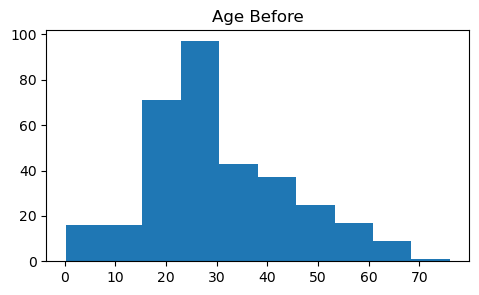

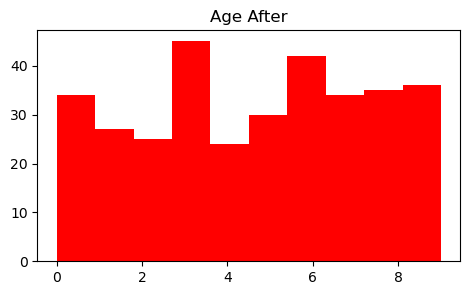

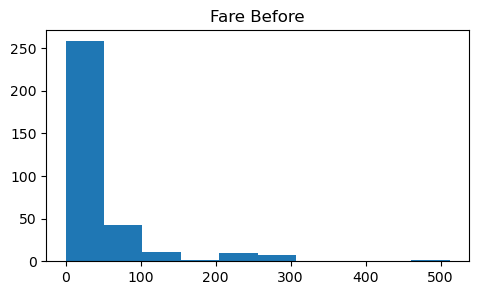

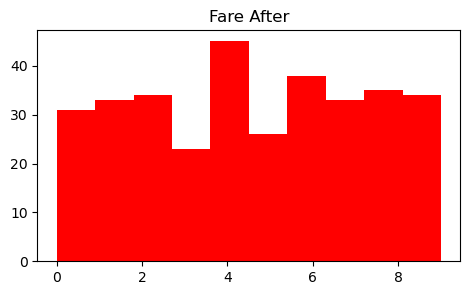

In [36]:
discretize(10,'quantile')

0.5933155080213904


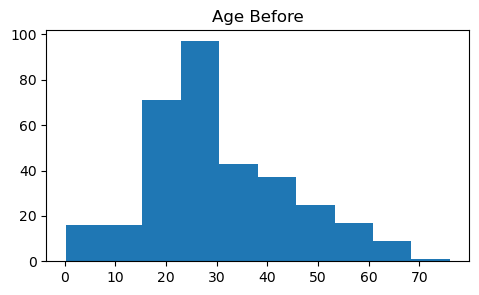

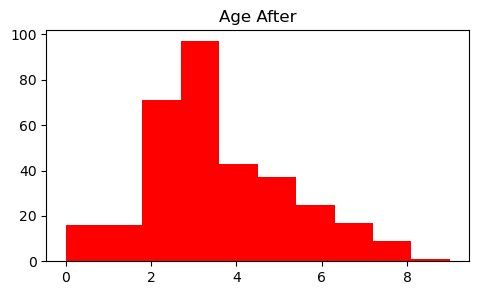

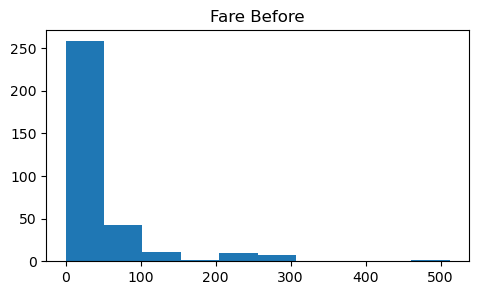

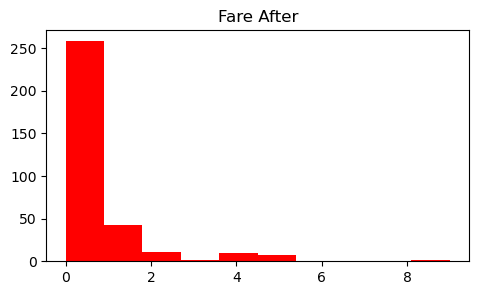

In [37]:
discretize(10,'uniform')

0.5814616755793227


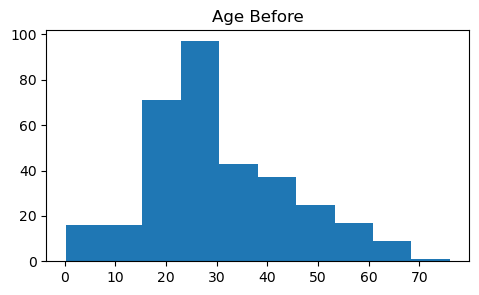

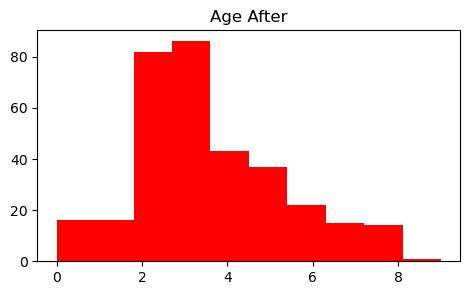

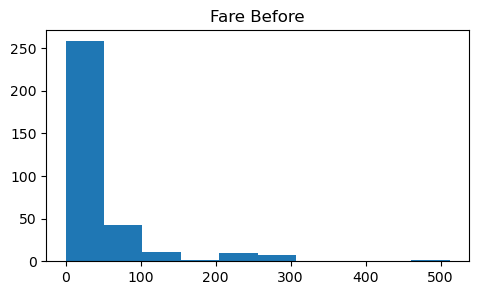

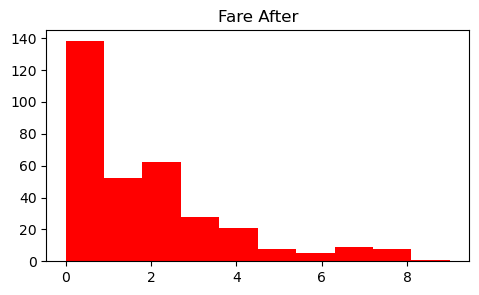

In [38]:
discretize(10,'kmeans')